<a href="https://colab.research.google.com/github/minseok40231/2025.LLM/blob/main/202021004%EA%B9%80%EB%AF%BC%EC%84%9D%20%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 503kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.64MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 14.1MB/s]


loss is 0.6732391715049744
loss is 0.45211678743362427
loss is 0.2977561354637146
loss is 0.22583645582199097
loss is 0.18048840761184692
loss is 0.15532124042510986
loss is 0.1328350007534027
loss is 0.11627843976020813
loss is 0.1014421358704567
loss is 0.09159694612026215
loss is 0.0844355896115303
loss is 0.0756106749176979
loss is 0.07274545729160309
loss is 0.06819450855255127
loss is 0.06317522376775742
loss is 0.061325397342443466
loss is 0.05858325585722923
loss is 0.05511430278420448
loss is 0.05456746742129326
loss is 0.051534805446863174
loss is 0.050311021506786346
loss is 0.04710393026471138
loss is 0.04608163610100746
loss is 0.04584652557969093
loss is 0.04358336701989174
loss is 0.0419212207198143
loss is 0.04188723862171173
loss is 0.04102496802806854
loss is 0.03856034204363823
loss is 0.03863257169723511
loss is 0.03717146813869476
loss is 0.03613203391432762
loss is 0.03595931455492973
loss is 0.035505734384059906
loss is 0.03464454784989357
loss is 0.0336911343038

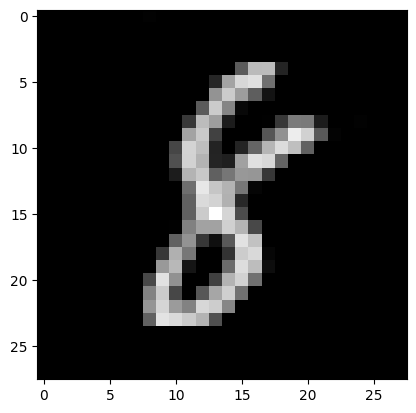

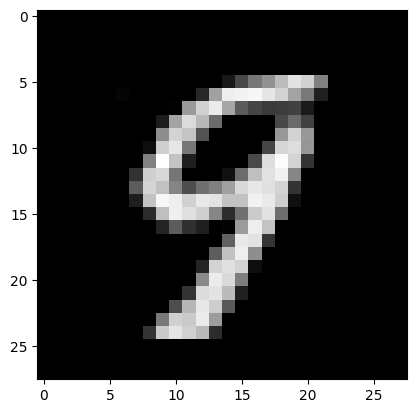

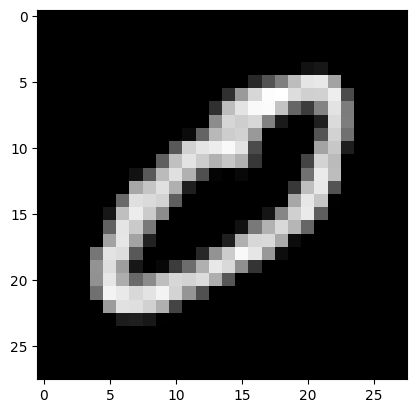

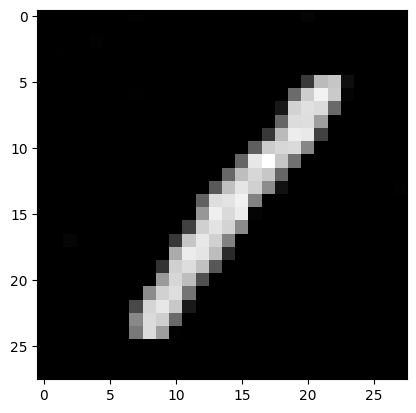

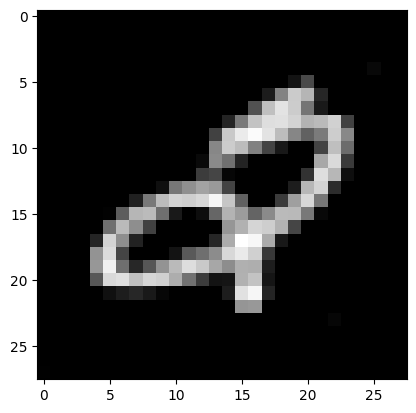

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1,16,3,padding=1),   # 16 x 28 x 28
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16,32,3,padding=1),  # 32 x 28 x 28
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32,64,3,padding=1),  # 64 x 28 x 28
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2,2)              # 64 x 14 x 14
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64,128,3,padding=1),  # 128 x 14 x 14

            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2,2),
            nn.Conv2d(128,256,3,padding=1),  # 256 x 7 x 7
            nn.ReLU()
        )

    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(batch_size, -1)
        return out

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(256,128,3,2,1,1), # 128 x 14 x 14
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128,64,3,1,1), # 64 x 14 x 14
            nn.ReLU(),
            nn.BatchNorm2d(64)
        )
        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(64,16,3,1,1), # 16 x 14 x 14
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16,1,3,2,1,1), # 1 x 28 x 28
            nn.ReLU()
        )

    def forward(self,x):
        out = x.view(batch_size,256,7,7)
        out = self.layer1(out)
        out = self.layer2(out)
        return out

mnist_train = dset.MNIST("./data/MNIST", train=True,
                         transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./data/MNIST", train=False,
                        transform=transforms.ToTensor(), target_transform=None, download=True)

batch_size = 100
train_loader = torch.utils.data.DataLoader(mnist_train,
                                           batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,
                                          batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

num_epoch = 5
Learning_rate = 0.0002
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder = Encoder().to(device)
decoder = Decoder().to(device)
parameters = itertools.chain(encoder.parameters(), decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=Learning_rate)

for i in range(num_epoch):
    for j,[image, label] in enumerate(train_loader):
        optimizer.zero_grad()
        image = image.to(device)
        z = encoder(image)
        output = decoder(z)
        loss = loss_func(output, image)
        loss.backward()
        optimizer.step()
        print("loss is", loss.cpu().item())

for i in range(1):
    for j,[image, label] in enumerate(test_loader):
        image = image.to(device)
        z = encoder(image)
        output = decoder(z)

        loss = loss_func(output,image)
        if j % 10 == 0:
            print(loss)
print("loss is", loss.cpu().item())

out_img = torch.squeeze(output.cpu().data)
print(out_img.size())
for i in range(5):
    plt.show()
    plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()